In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("Data/construction_cost_prediction_dataset.csv")

In [5]:
df.shape

(5000, 12)

In [7]:
dataset_columns = list(df.columns)
dataset_columns

['Project_ID',
 'Project_Type',
 'Total_Area_SqFt',
 'Number_of_Floors',
 'Material_Cost_per_SqFt',
 'Labor_Cost_per_SqFt',
 'Project_Duration_Months',
 'Location_Type',
 'Transportation_Cost',
 'Inflation_Rate',
 'Complexity',
 'Total_Construction_Cost']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               5000 non-null   int64  
 1   Project_Type             5000 non-null   object 
 2   Total_Area_SqFt          5000 non-null   int64  
 3   Number_of_Floors         5000 non-null   int64  
 4   Material_Cost_per_SqFt   5000 non-null   float64
 5   Labor_Cost_per_SqFt      5000 non-null   float64
 6   Project_Duration_Months  5000 non-null   int64  
 7   Location_Type            5000 non-null   object 
 8   Transportation_Cost      5000 non-null   float64
 9   Inflation_Rate           5000 non-null   float64
 10  Complexity               5000 non-null   object 
 11  Total_Construction_Cost  5000 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 468.9+ KB


In [15]:
df.head()

Project_ID Project_Type  Total_Area_SqFt  Number_of_Floors  \
0           1    Mixed-use             5830                 7   
1           2  Residential             8371                16   
2           3    Mixed-use             8735                16   
3           4    Mixed-use             4112                15   
4           5  Residential             3118                 6   

   Material_Cost_per_SqFt  Labor_Cost_per_SqFt  Project_Duration_Months  \
0                  139.54                85.47                       28   
1                   89.32                75.01                       35   
2                   33.01                21.81                       24   
3                   96.53                63.32                       12   
4                  121.19                70.50                        8   

  Location_Type  Transportation_Cost  Inflation_Rate Complexity  \
0    Semi-Urban             28502.03            3.99     Medium   
1         Rural             40146.26            4.58     Simple   
2         Rural             17061.08            3.00     Simple   
3         Rural             11892.13            3.43     Simple   
4    Semi-Urban             41487.63            4.12    Complex   

   Total_Construction_Cost  
0               1829179.31  
1               1478755.46  
2                510279.36  
3                691740.83  
4               1068306.10

In [17]:
# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values in categorical columns:
Project_Type: ['Mixed-use' 'Residential' 'Commercial']
Location_Type: ['Semi-Urban' 'Rural' 'Urban']
Complexity: ['Medium' 'Simple' 'Complex']


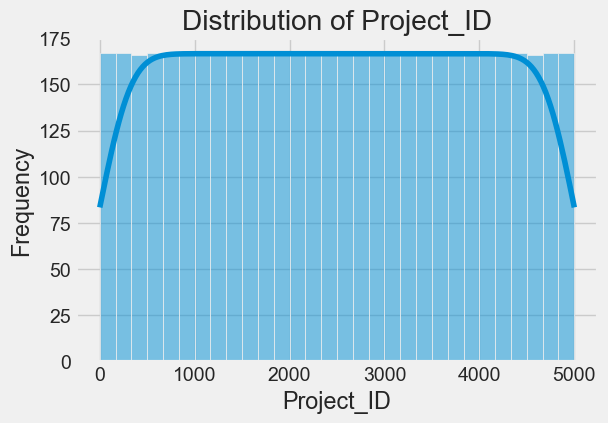

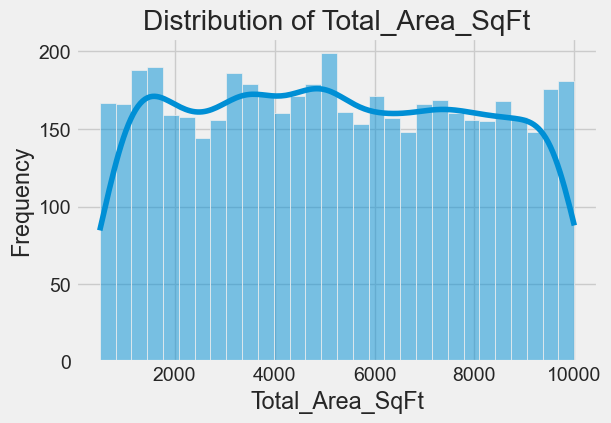

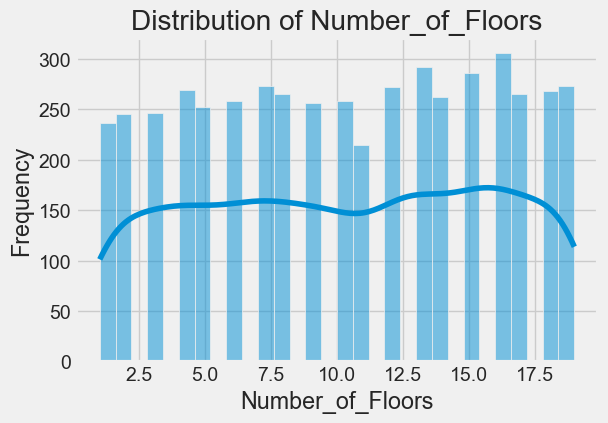

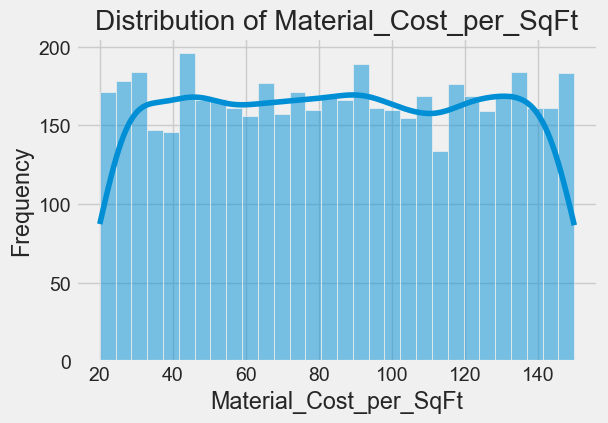

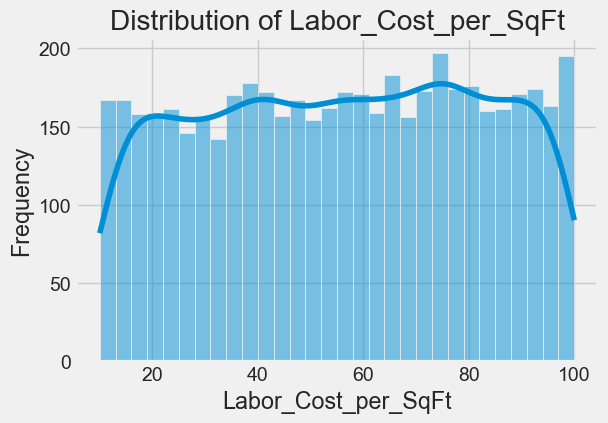

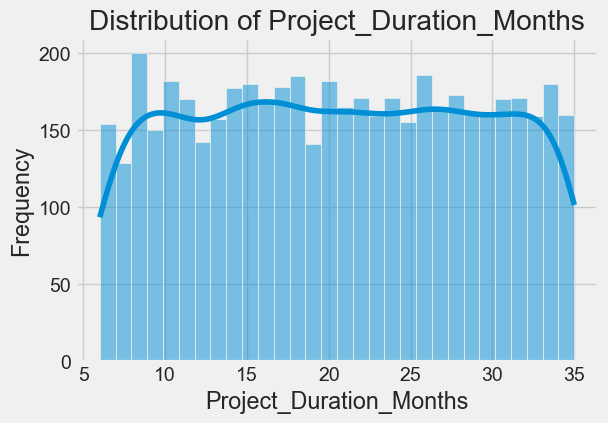

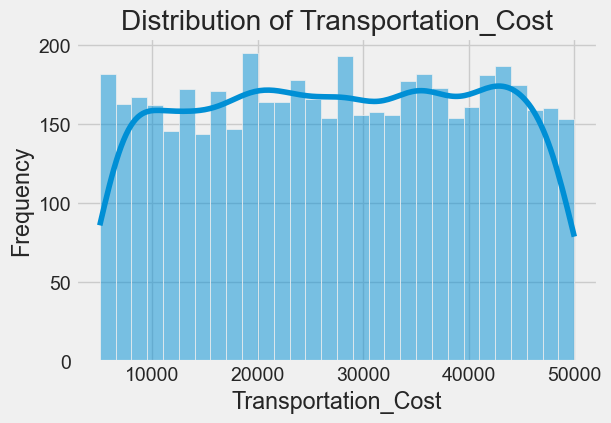

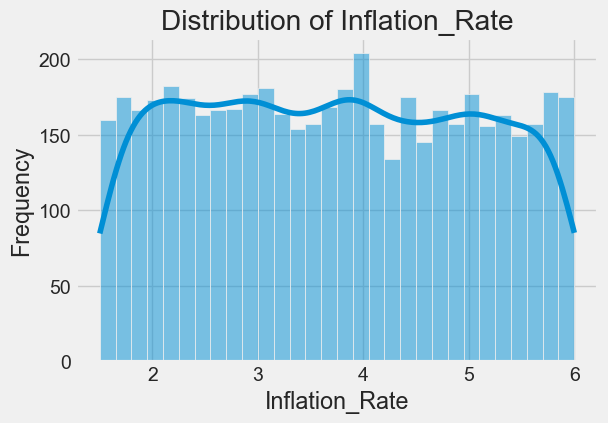

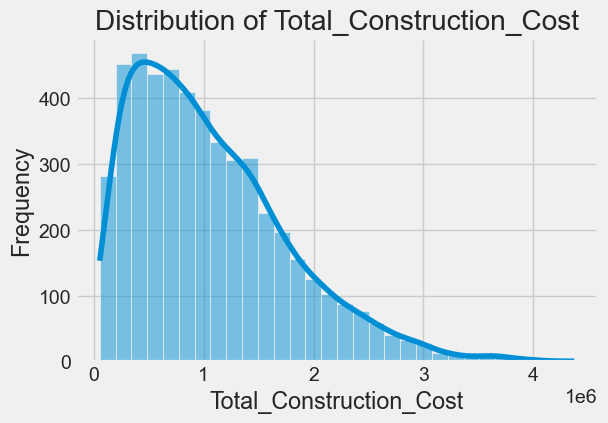

In [19]:
# Plot the distribution of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

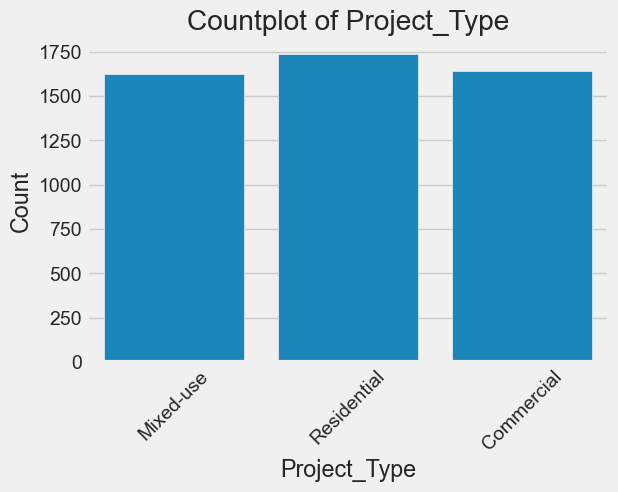

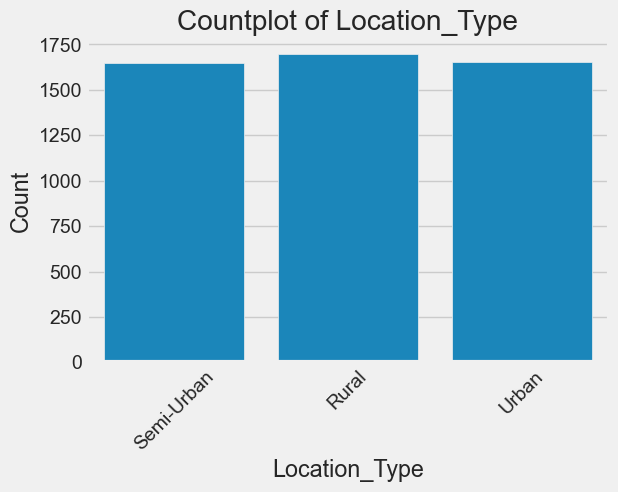

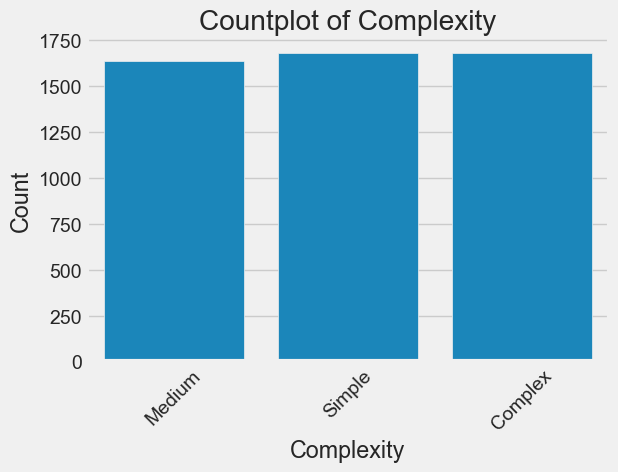

In [21]:
# Analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

In [26]:
df.columns

Index(['Project_ID', 'Project_Type', 'Total_Area_SqFt', 'Number_of_Floors',
       'Material_Cost_per_SqFt', 'Labor_Cost_per_SqFt',
       'Project_Duration_Months', 'Location_Type', 'Transportation_Cost',
       'Inflation_Rate', 'Complexity', 'Total_Construction_Cost'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

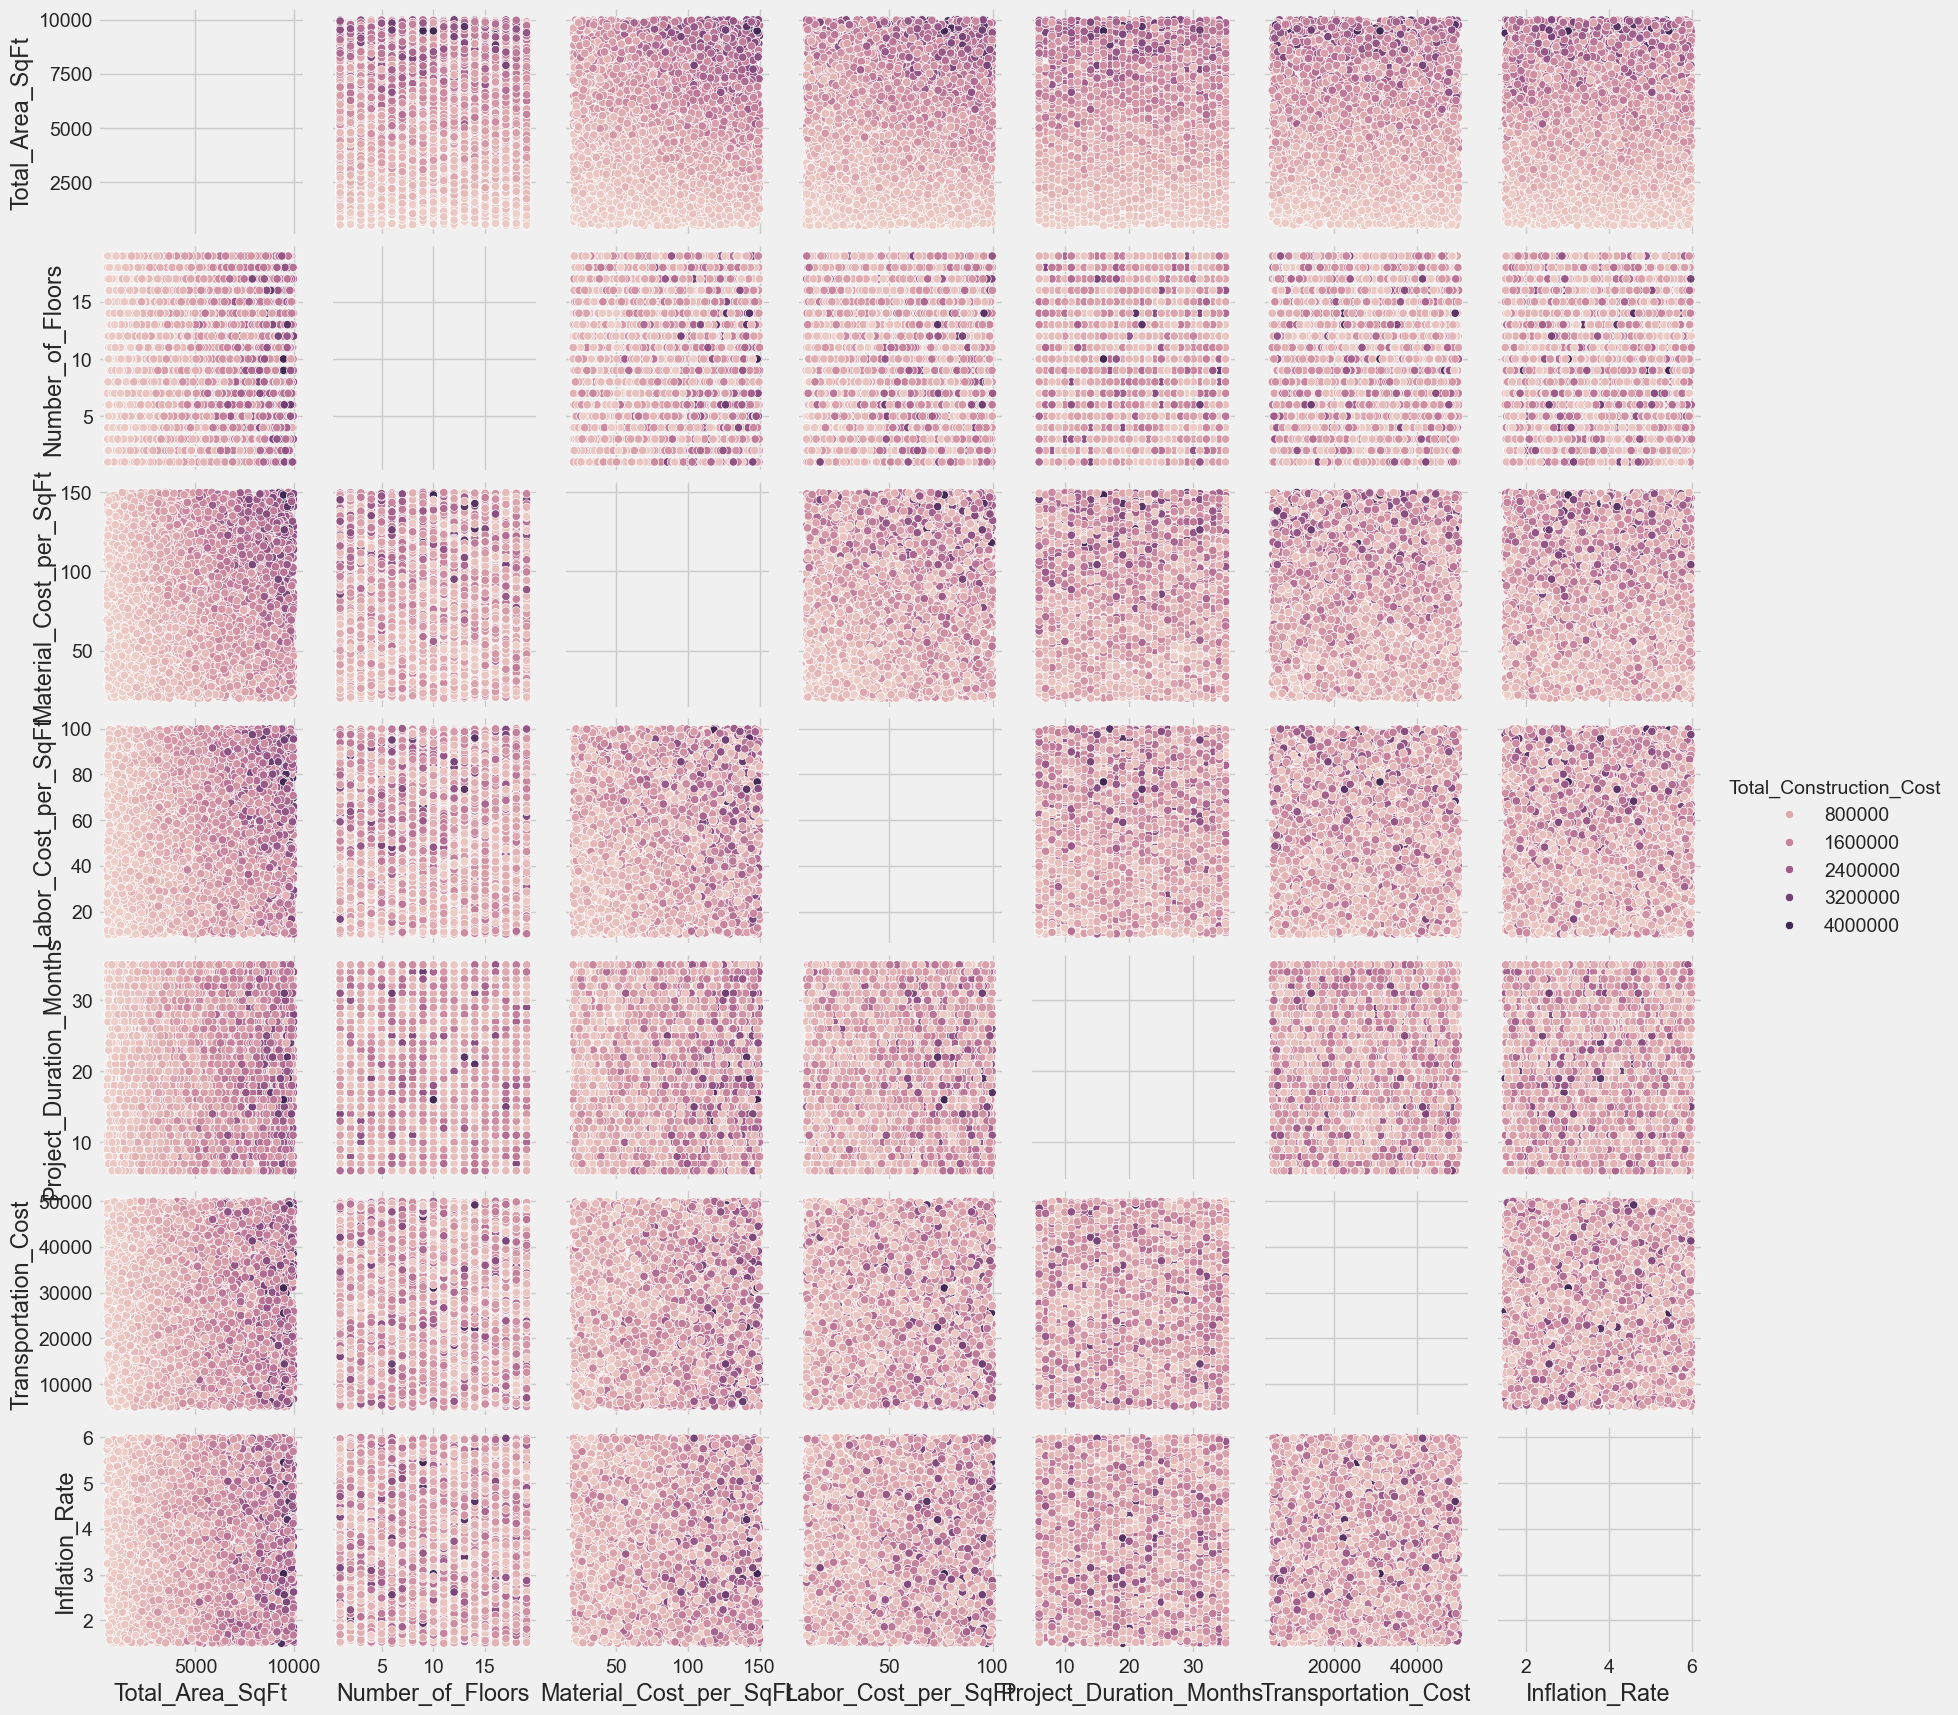

In [28]:
# Pairplot for selected numerical variables
selected_cols = ['Total_Area_SqFt', 'Number_of_Floors', 'Material_Cost_per_SqFt', 'Labor_Cost_per_SqFt', 'Project_Duration_Months', 'Transportation_Cost', 'Inflation_Rate', 'Total_Construction_Cost' ]
sns.pairplot(df[selected_cols], hue='Total_Construction_Cost', diag_kind='kde')
plt.show()